In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## <font color="#FF9900">Запускать нужно два раза подряд</font> (графики не меняют размер после первого)

In [45]:
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
from time import sleep

plt.rcParams.update({
  'font.size': 15, 
  'figure.figsize' : [25, 13],
  'lines.linewidth' : 2,
  })


In [46]:
titles = ['text-size',	'pat-size',	'time',	'comparisons']


In [47]:
df = pd.DataFrame(columns=titles)
display(df)


,text-size,pat-size,time,comparisons


### Считывание и функции для отрисовки


In [48]:
array_nums = ['10000', '100000']
array_text_types = ['binary', 'quad']
array_pattern_types = ['simple', 'advanced1', 'advanced2', 'advanced3', 'advanced4']
# array_func_names = ['slow', 'kmp1', 'kmp2', 'rk']
array_func_names = ['slow', 'kmp1', 'kmp2', 'rk', 'bm']


map_algos = {}

# Разделяем по размеру
for num in array_nums:
    map_algos[num] = {}
    for text in array_text_types:
        map_algos[num][text] = {}
        for pattern in array_pattern_types:
            map_algos[num][text][pattern] = []
            for name in array_func_names:
              map_algos[num][text][pattern].append(pd.read_csv(
                  f'tests/size{num}/{name}_{text}_{pattern}_{num}.csv', sep=';'))

# map_algos


In [49]:
import matplotlib.ticker as ticker

def plotTestsTimeComps(num: str, text_type: str, pattern_type: str):
  fig, axs = plt.subplots(nrows= 1 , ncols= 2)
  fig.suptitle(f'All algorithms; Text size is <{num}>, Text type is <{text_type}>, Pattern type is <{pattern_type}>')

  i = 0
  param = 'time'
  for item in map_algos[num][text_type][pattern_type]:
    item.plot(ax=axs[0], x='pat-size', y=param, xlabel='pattern size', ylabel='nanoseconds',
                  title=f'Graphs with algorithm {param}', label=array_func_names[i])
    i += 1
  axs[0].legend()

  i = 0
  param = 'comparisons'
  for item in map_algos[num][text_type][pattern_type]:
    item.plot(ax=axs[1], x='pat-size', y=param, xlabel='pattern size', ylabel='comparisons',
                  title=f'Graphs with algorithm {param}', label=array_func_names[i])
    i += 1
  axs[1].legend()

  # axs[0].xaxis.set_major_locator(ticker.MultipleLocator(300))
  # axs[1].xaxis.set_major_locator(ticker.MultipleLocator(300))
  
  plt.show()

### <font color="#60BBD0">Все алгоритмы</font>
n - размер текста и m - размер паттерна
1. slow - Наивный алгоритм с асимптотикой O((n - m) * m)
2. kmp1 - обычный алгоритм Кнута-Морриса-Пратта (КМП) с асимптотикой O(m + n)
3. kmp2 - алгоритм Кнута-Морриса-Пратта (КМП) с использованием утончённых граней с асимптотикой O(m + n)
4. rk   - алгоритм Рабина-Карпа (Хэш-функция) с асимптотикой O((n - m + 1) * m)
5. bm   - алгоритм Бойера-Мура (таблицы суффиксов) с асимптотикой

In [50]:
# алгоритм Бойера-Мура очень страшный и часто портит графики, поэтому можно убрать комментирий со следующей строки, чтобы убрать этот алгоритм

# array_func_names = ['slow', 'kmp1', 'kmp2', 'rk']

##### Size - 10000; Text - Binary; Pattern - Simple


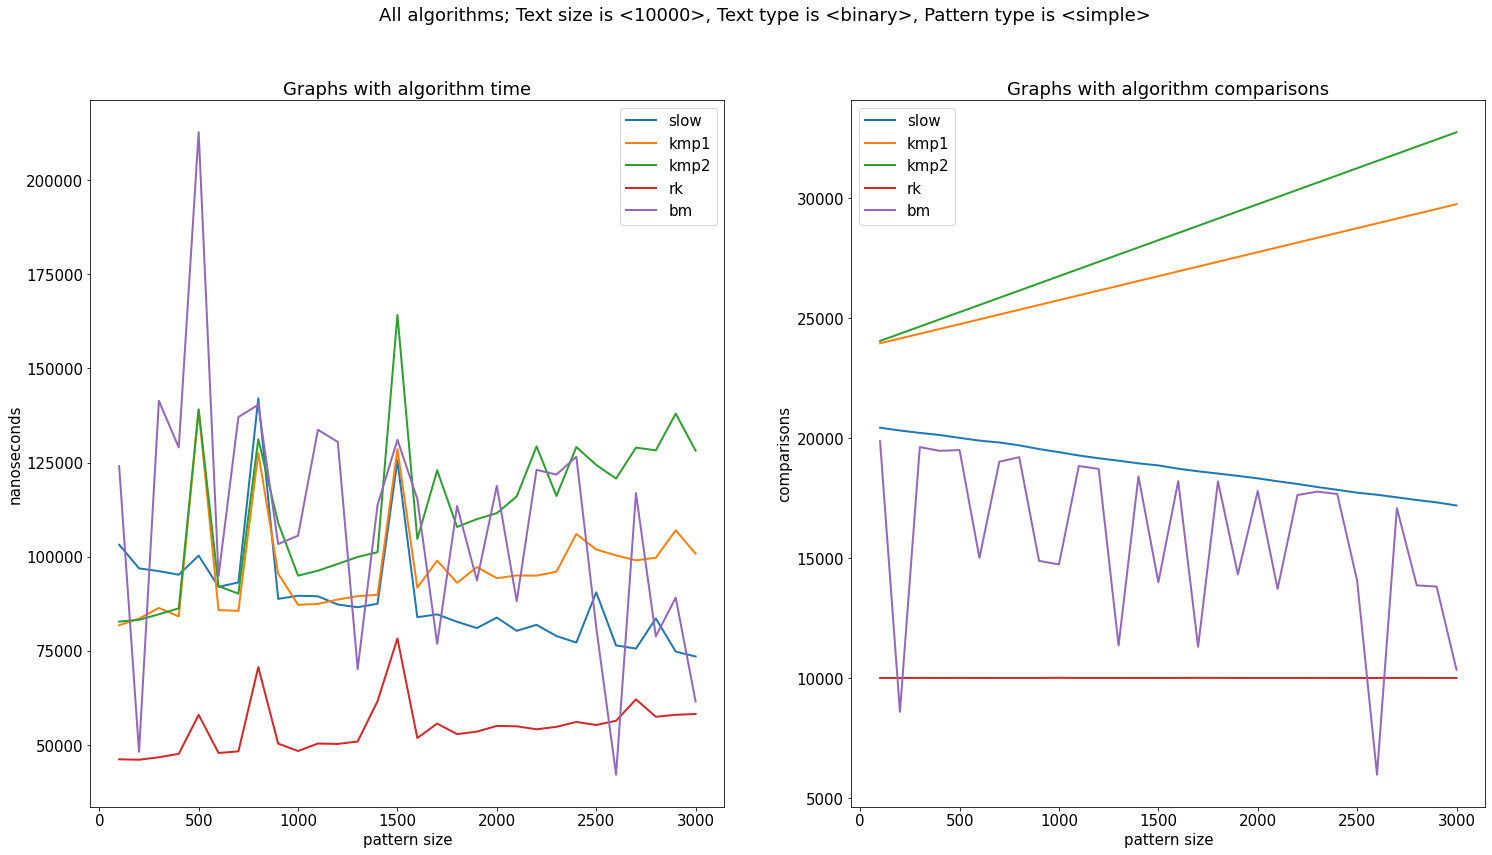

In [51]:
plotTestsTimeComps('10000', 'binary', 'simple')
# Самый некрасивый график, но дальше будет лучше :)

##### <font color="#FF6600">Вывод:</font>
* Сразу можно заметить выброс при pattern size = 200, но его мы можем наблюдать у всех алгоритмов, следовательно он связан с генерацией такой строки и паттерна.
* Поначалу наивный (slow) алгоритм медленнее всех, но затем он обгоняет оба kmp из-за того, что pattern size очень большой и составляет от 1% до 30%. И он будет просто прерываться на break при несовпадении символов
* Алгоритмы КМП (kmp1 и kmp2) могут работать медленно при очень большой длине паттерна из-за сложности вычисления префикс-функции и возможных ненужных сравнений символов. В таких случаях, другие алгоритмы, такие как алгоритм Рабина-Карпа или алгоритм Бойера-Мура, могут быть более эффективными в поиске подстроки.
* Так как алгоритм Рабина-Карпа основан на хешировании и сравнении хеш-значений подстроки и "окон" текста, то он запросто обходит все другие алгоритмы.

##### Size - 10000; Text - Quad; Pattern - Simple


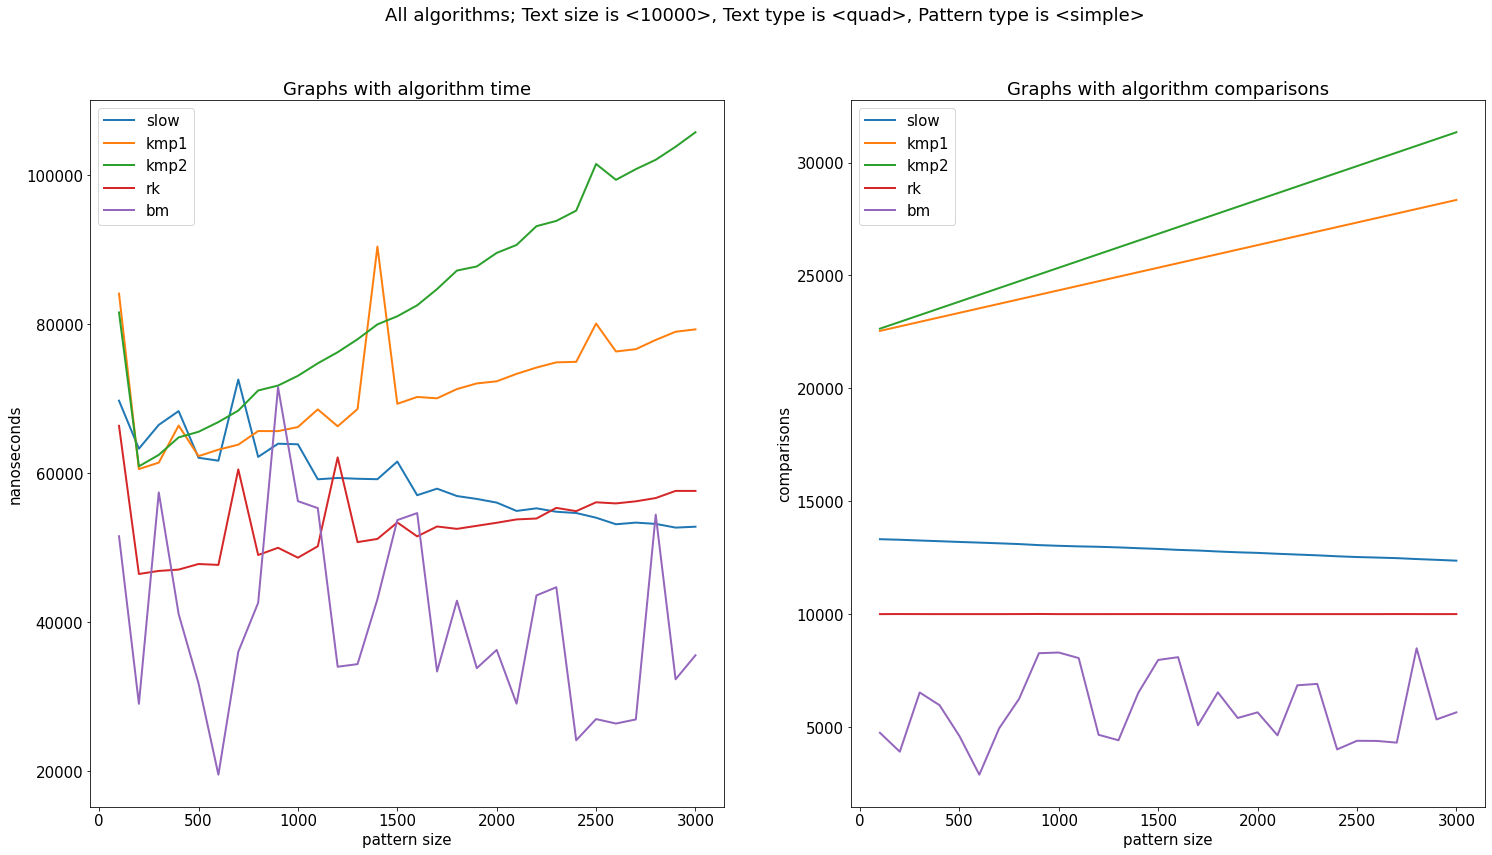

In [52]:
plotTestsTimeComps('10000', 'quad', 'simple')


##### Size - 100000; Text - Binary; Pattern - Simple


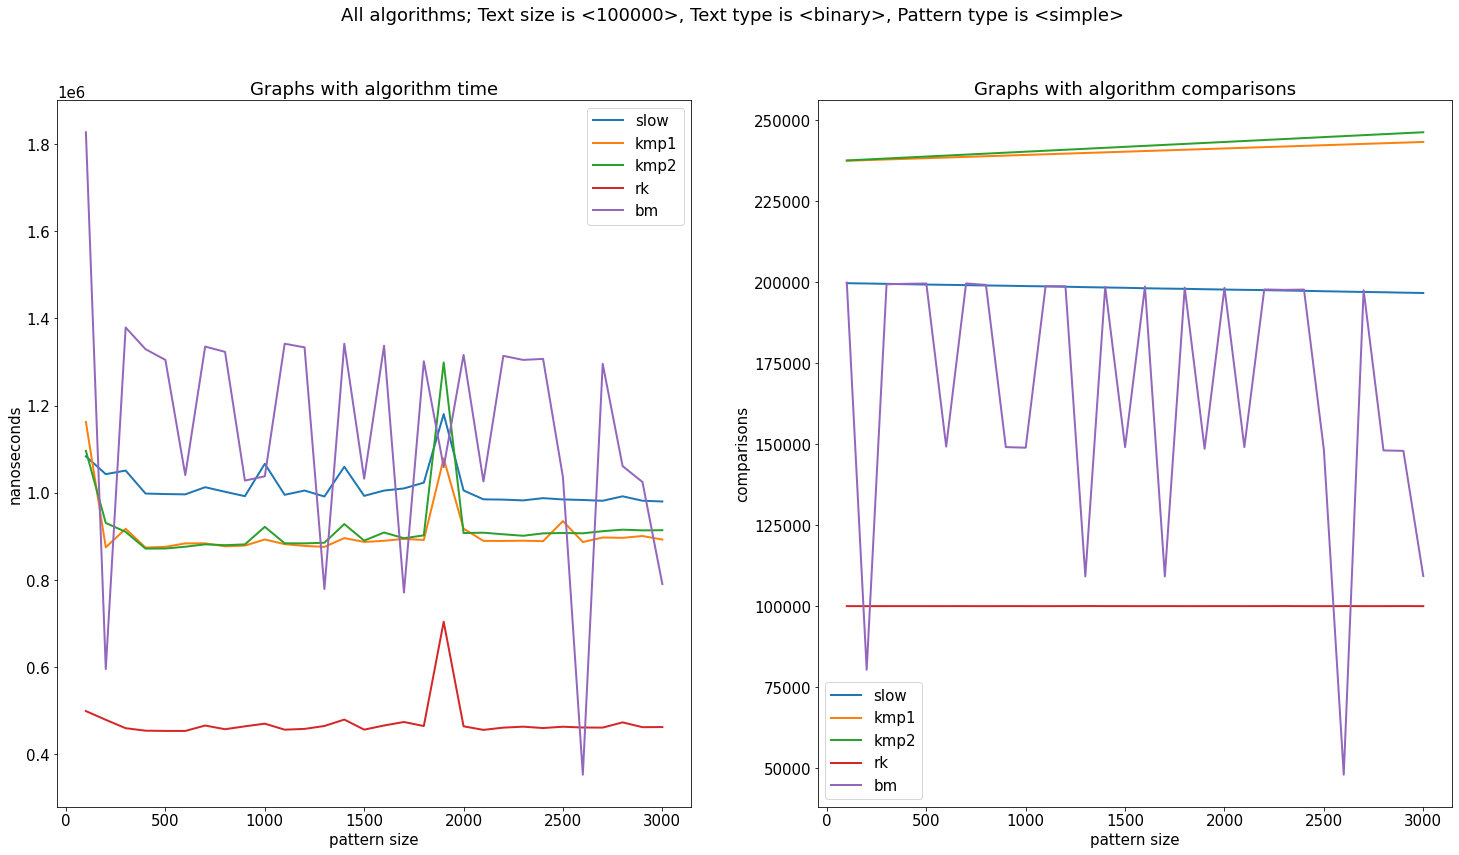

In [53]:
plotTestsTimeComps('100000', 'binary', 'simple')


##### Size - 100000; Text - Quad; Pattern - Simple


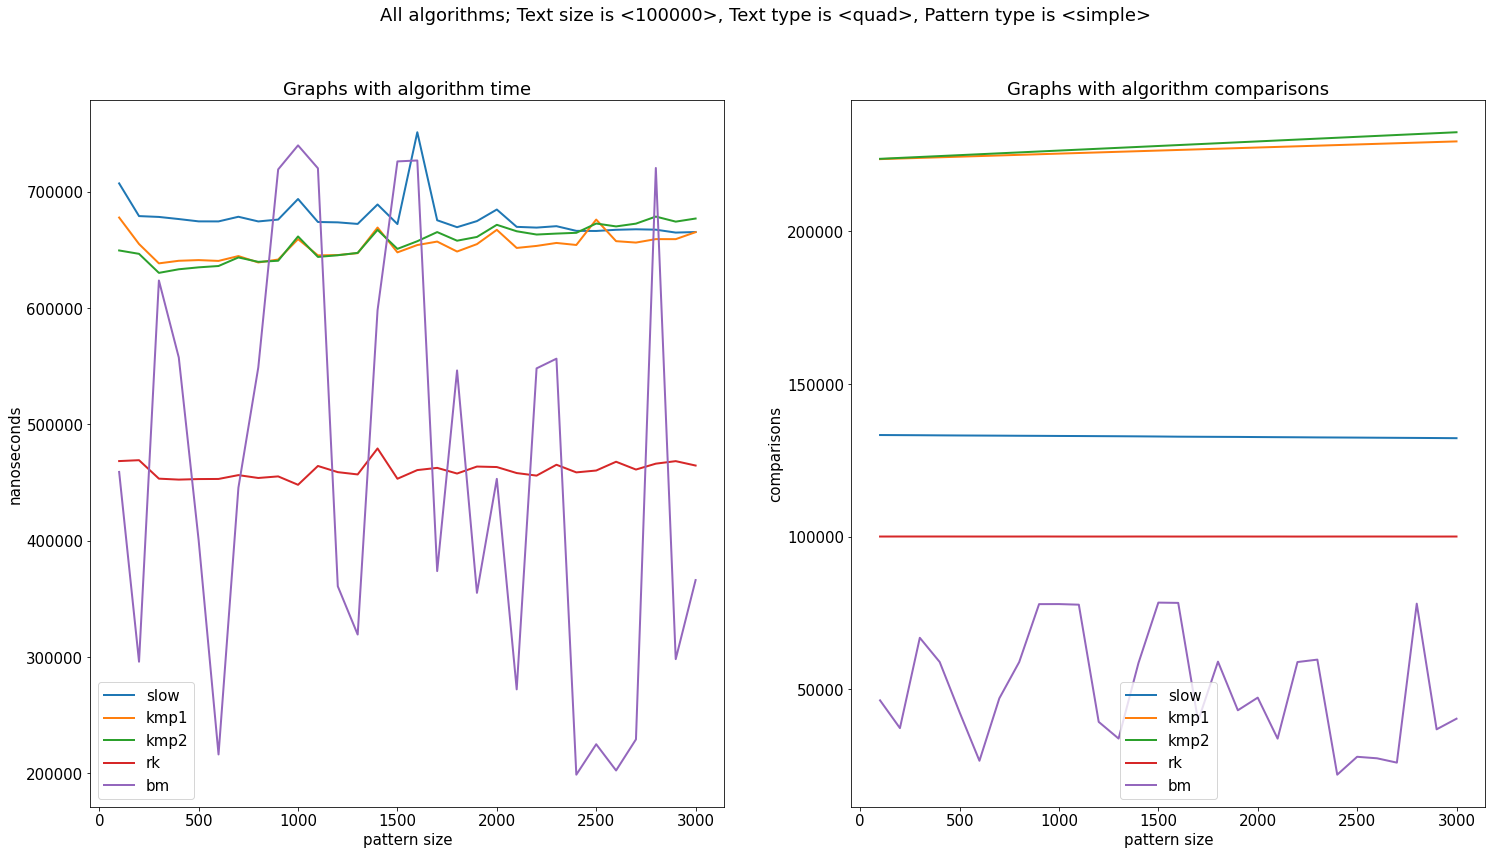

In [54]:
plotTestsTimeComps('100000', 'quad', 'simple')


##### Size - 10000; Text - Binary; Pattern - Advance


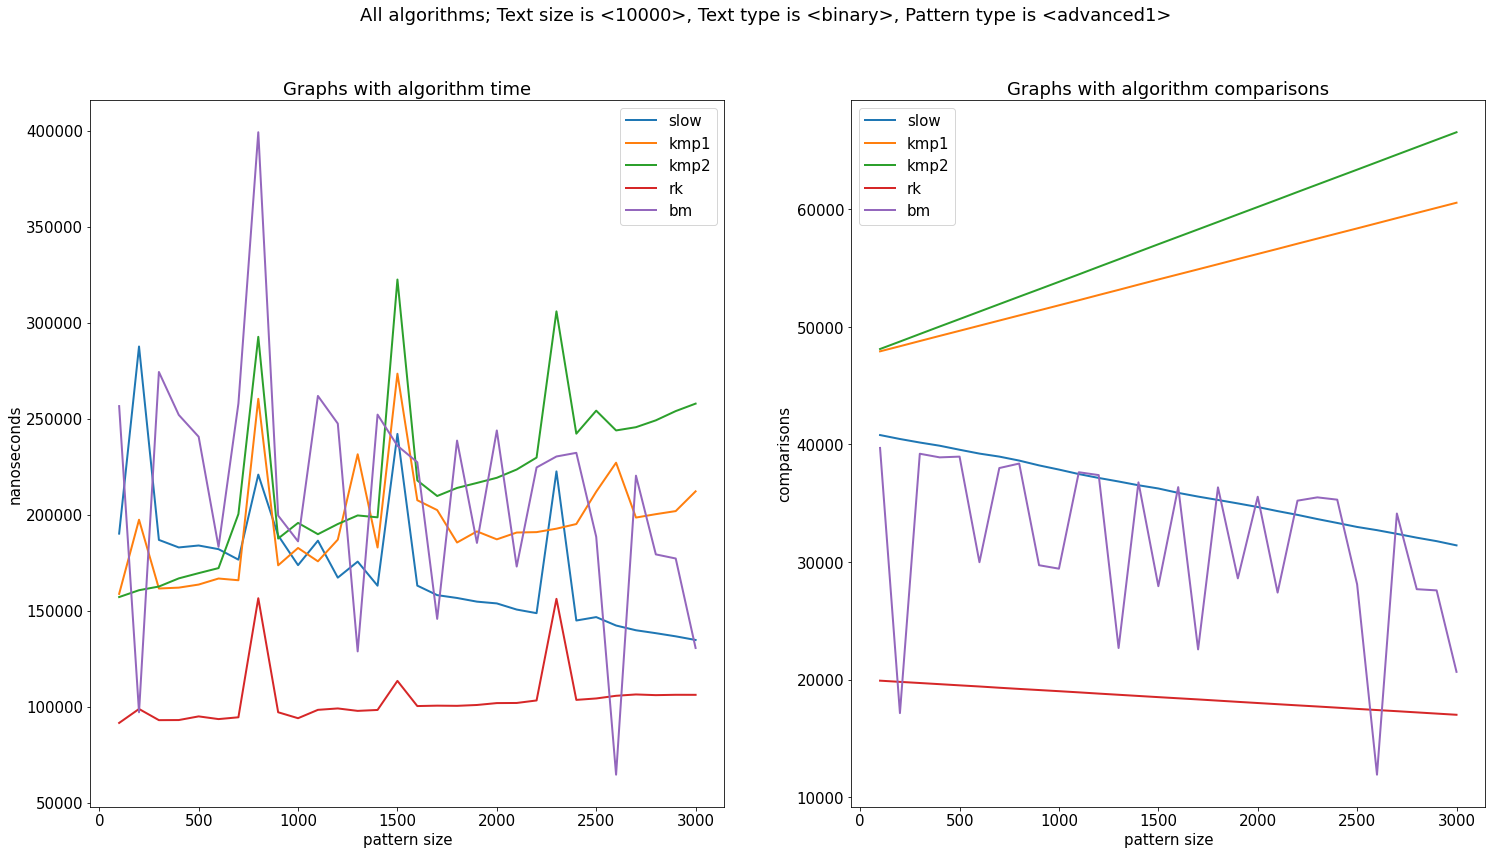

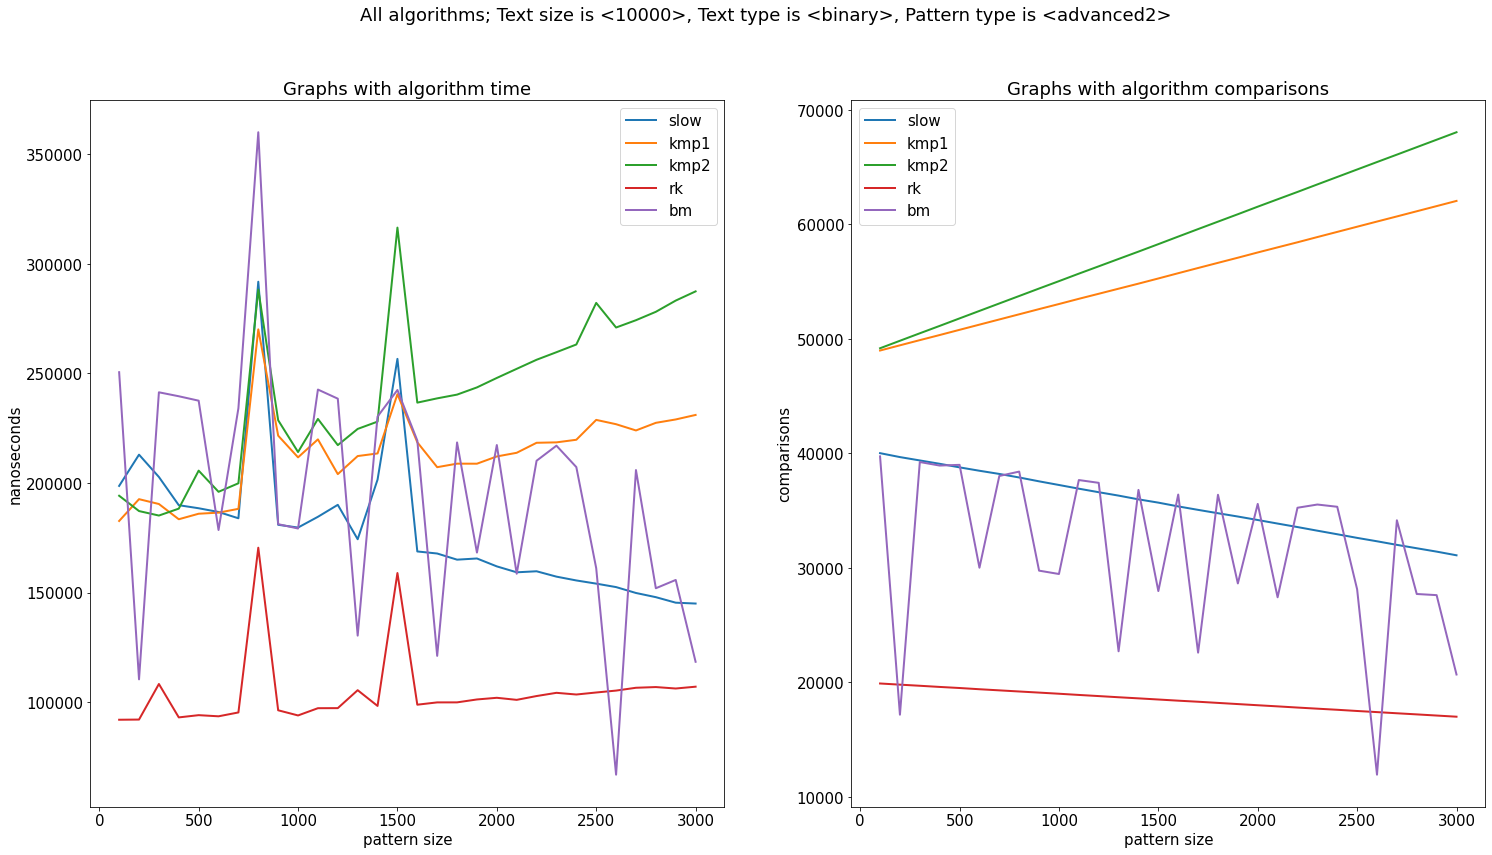

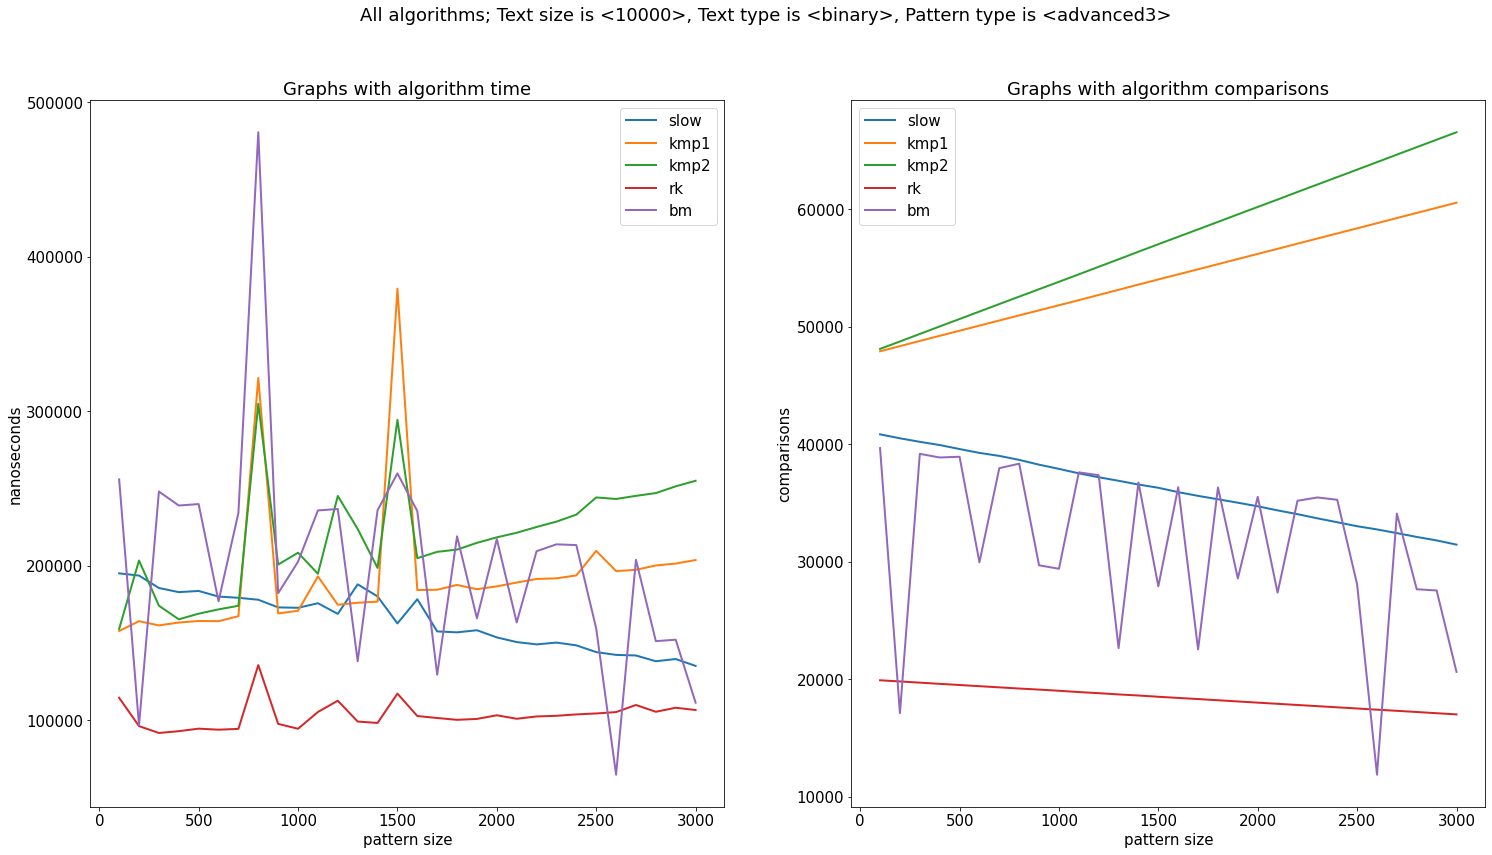

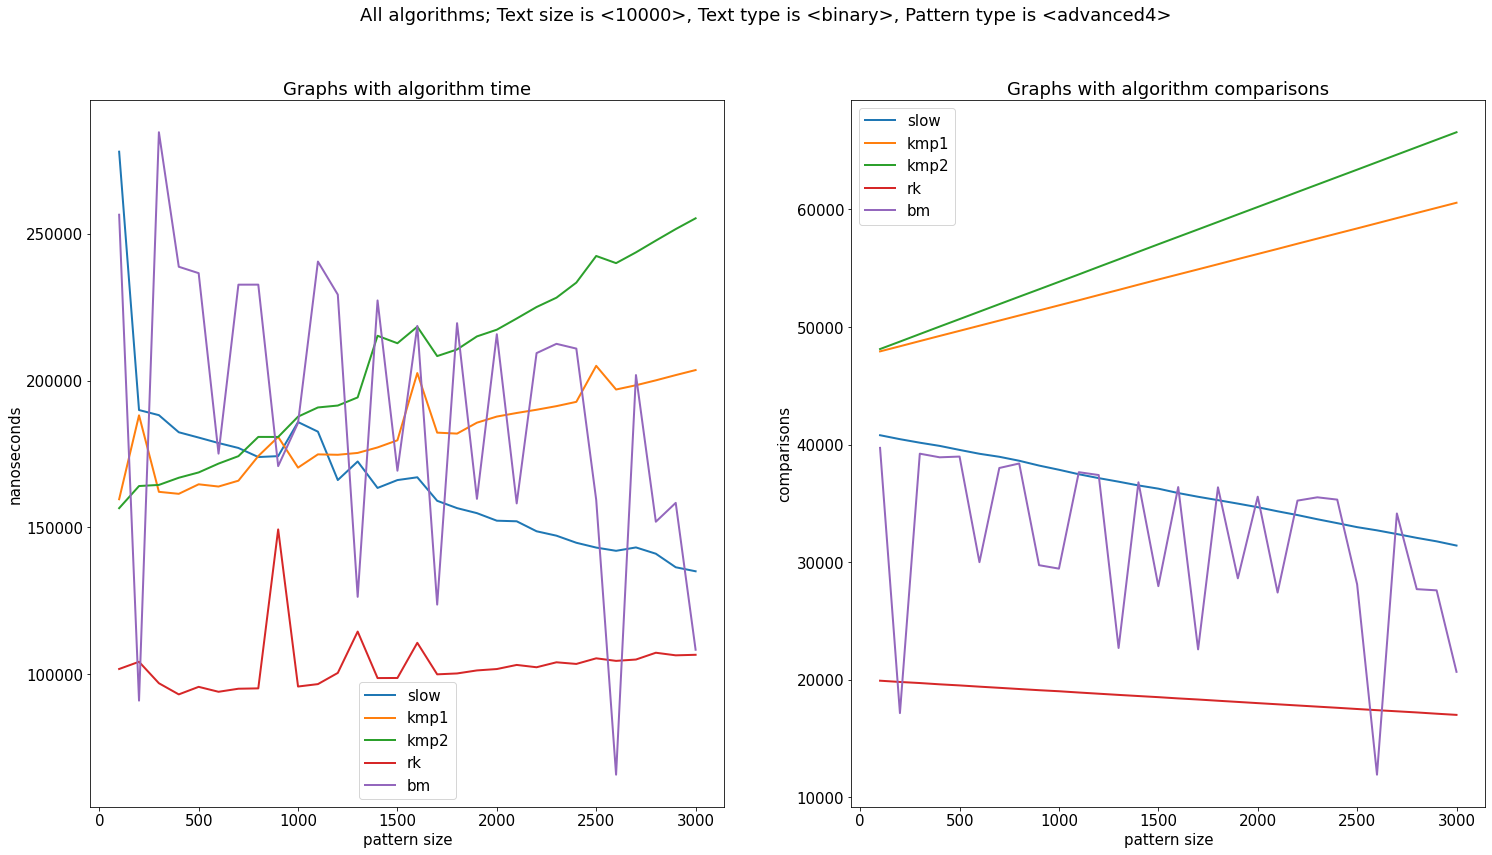

In [55]:
plotTestsTimeComps('10000', 'binary', 'advanced1')
plotTestsTimeComps('10000', 'binary', 'advanced2')
plotTestsTimeComps('10000', 'binary', 'advanced3')
plotTestsTimeComps('10000', 'binary', 'advanced4')


##### Size - 10000; Text - Quad; Pattern - Advance


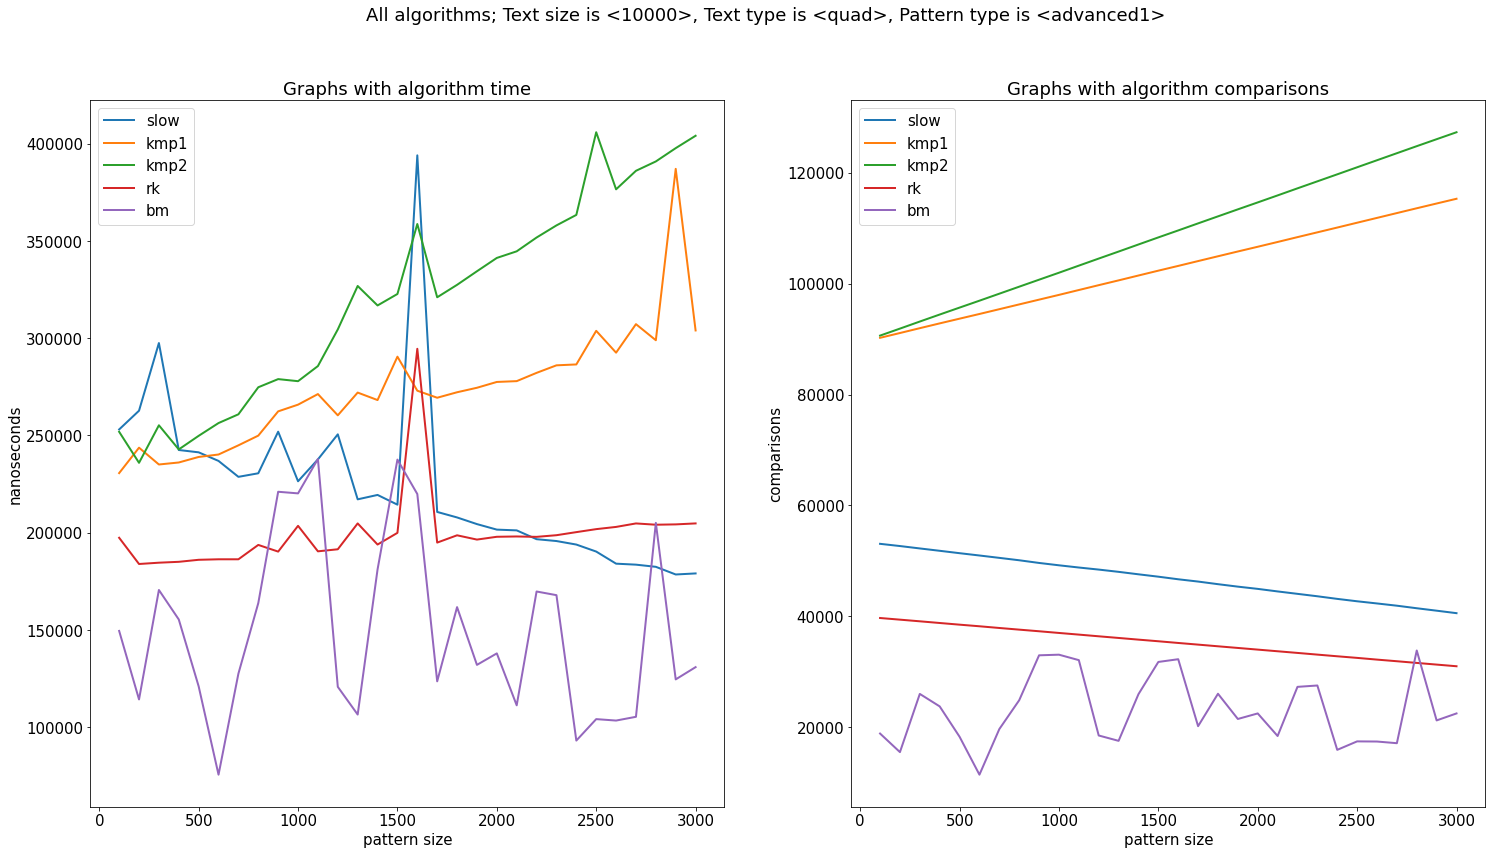

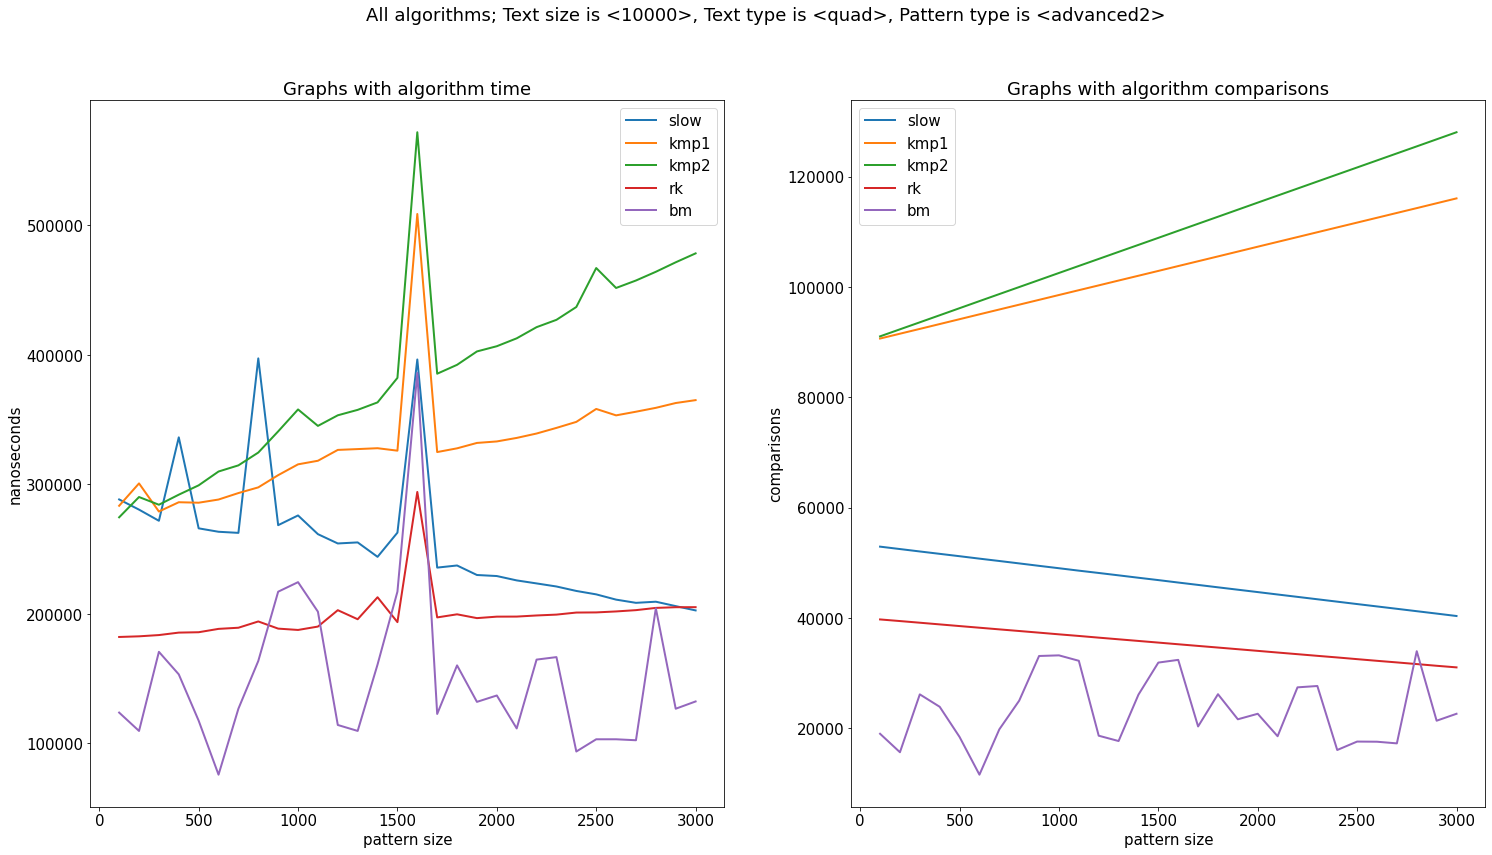

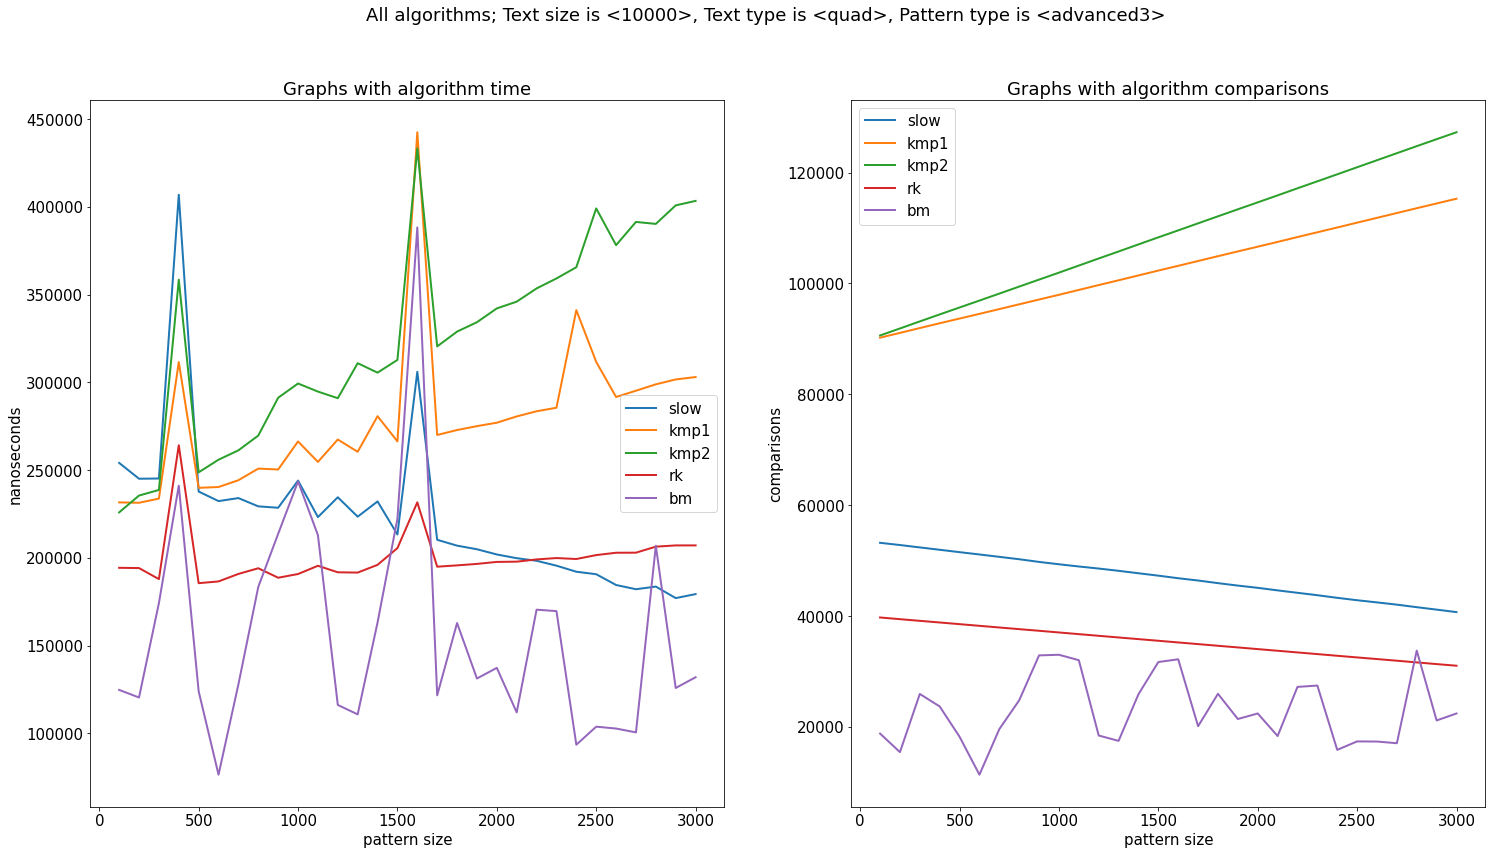

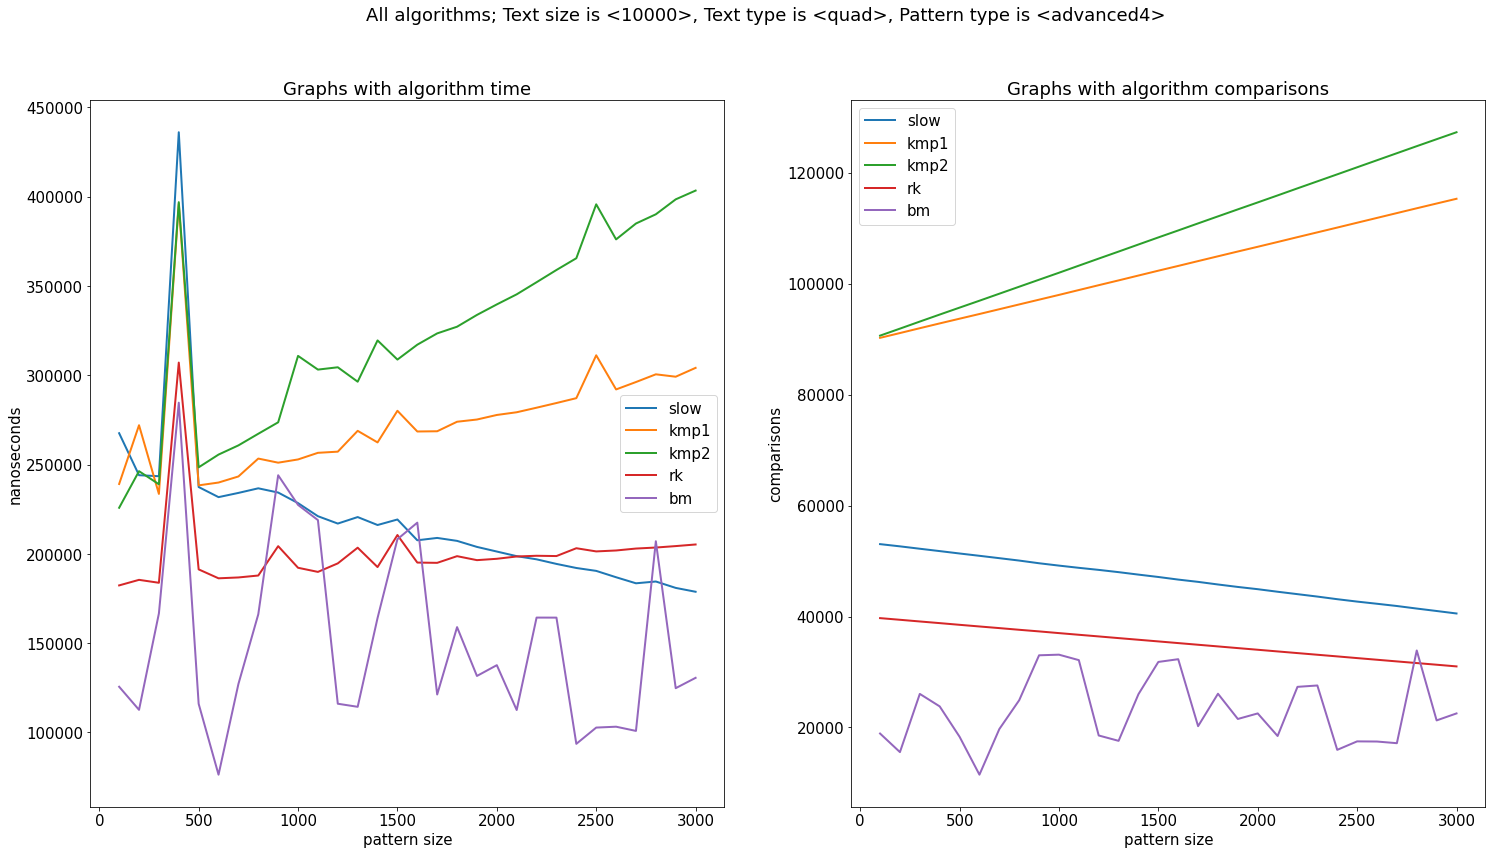

In [56]:
plotTestsTimeComps('10000', 'quad', 'advanced1')
plotTestsTimeComps('10000', 'quad', 'advanced2')
plotTestsTimeComps('10000', 'quad', 'advanced3')
plotTestsTimeComps('10000', 'quad', 'advanced4')


##### Size - 100000; Text - Binary; Pattern - Advance


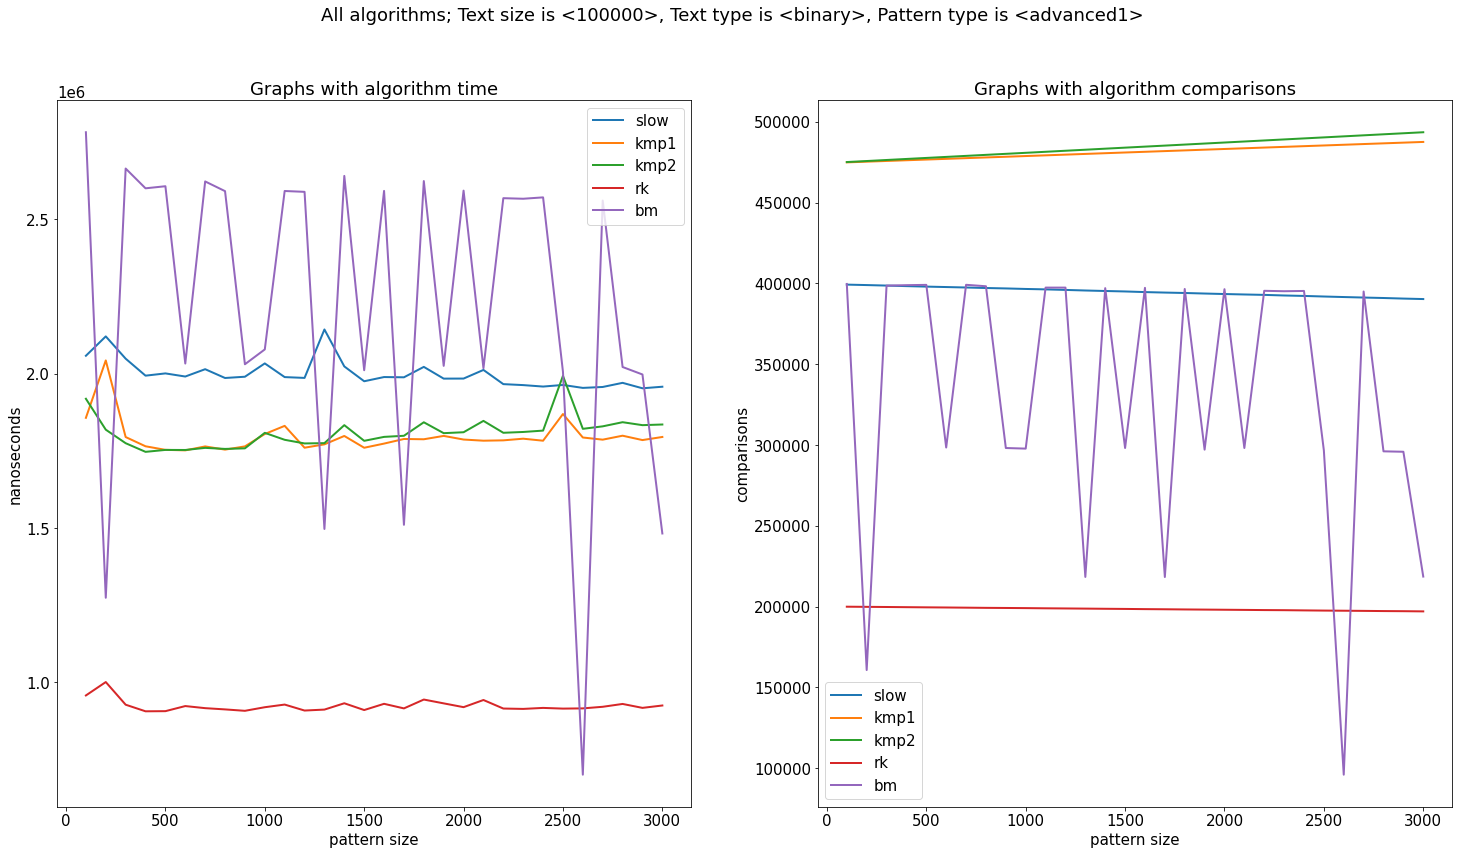

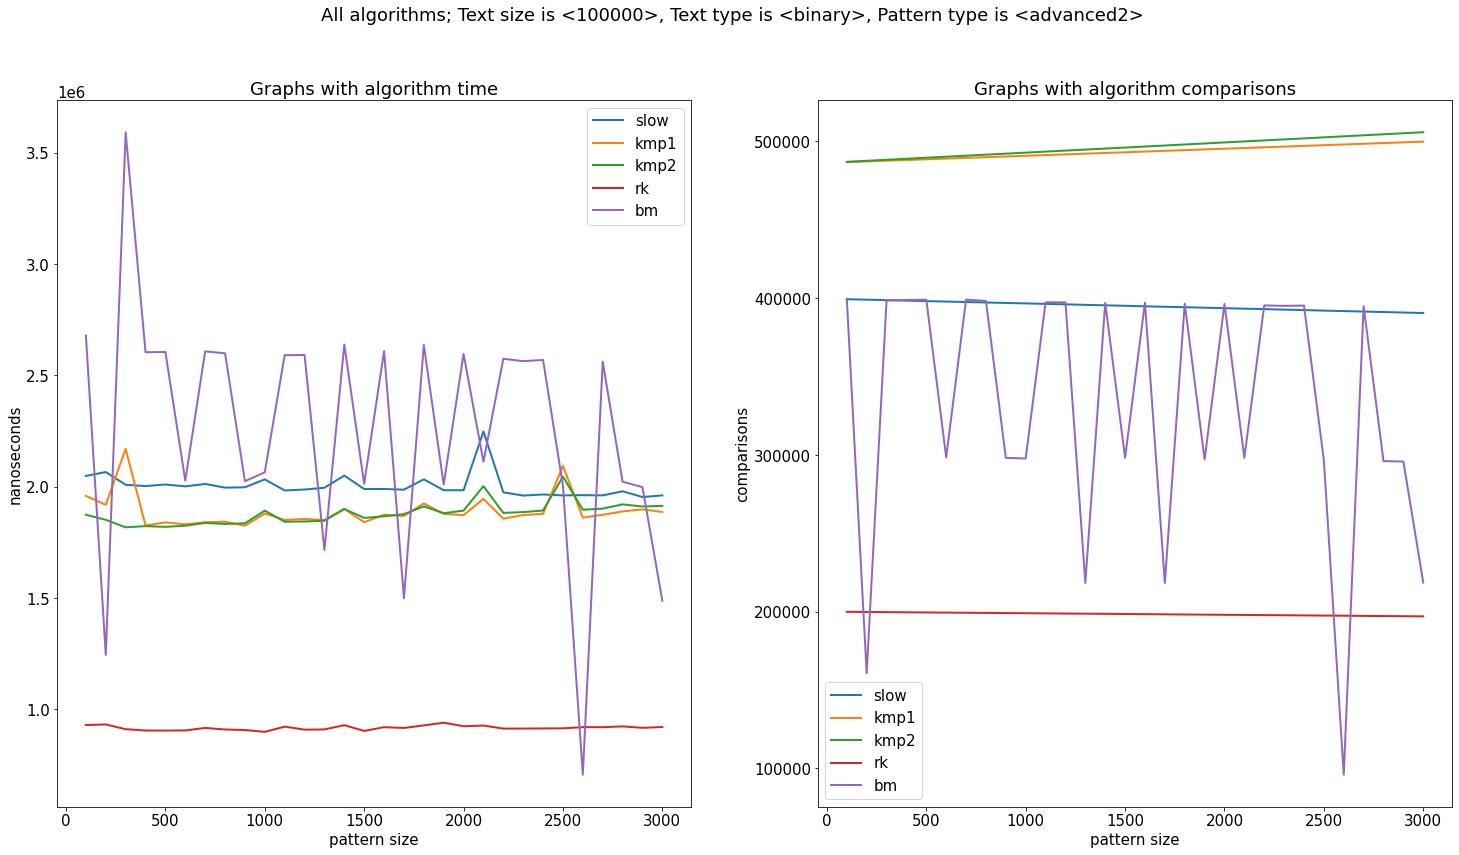

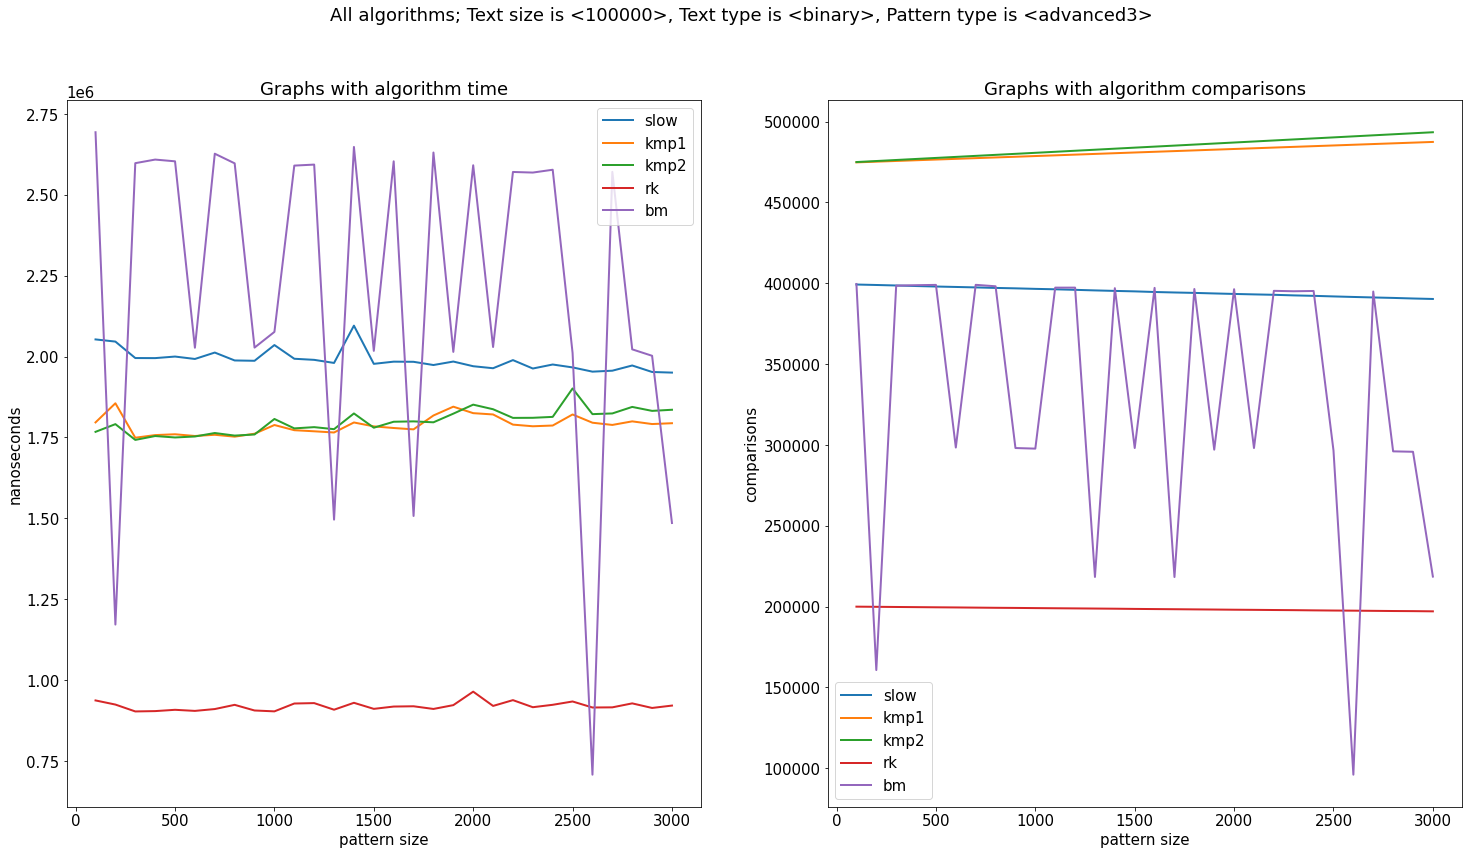

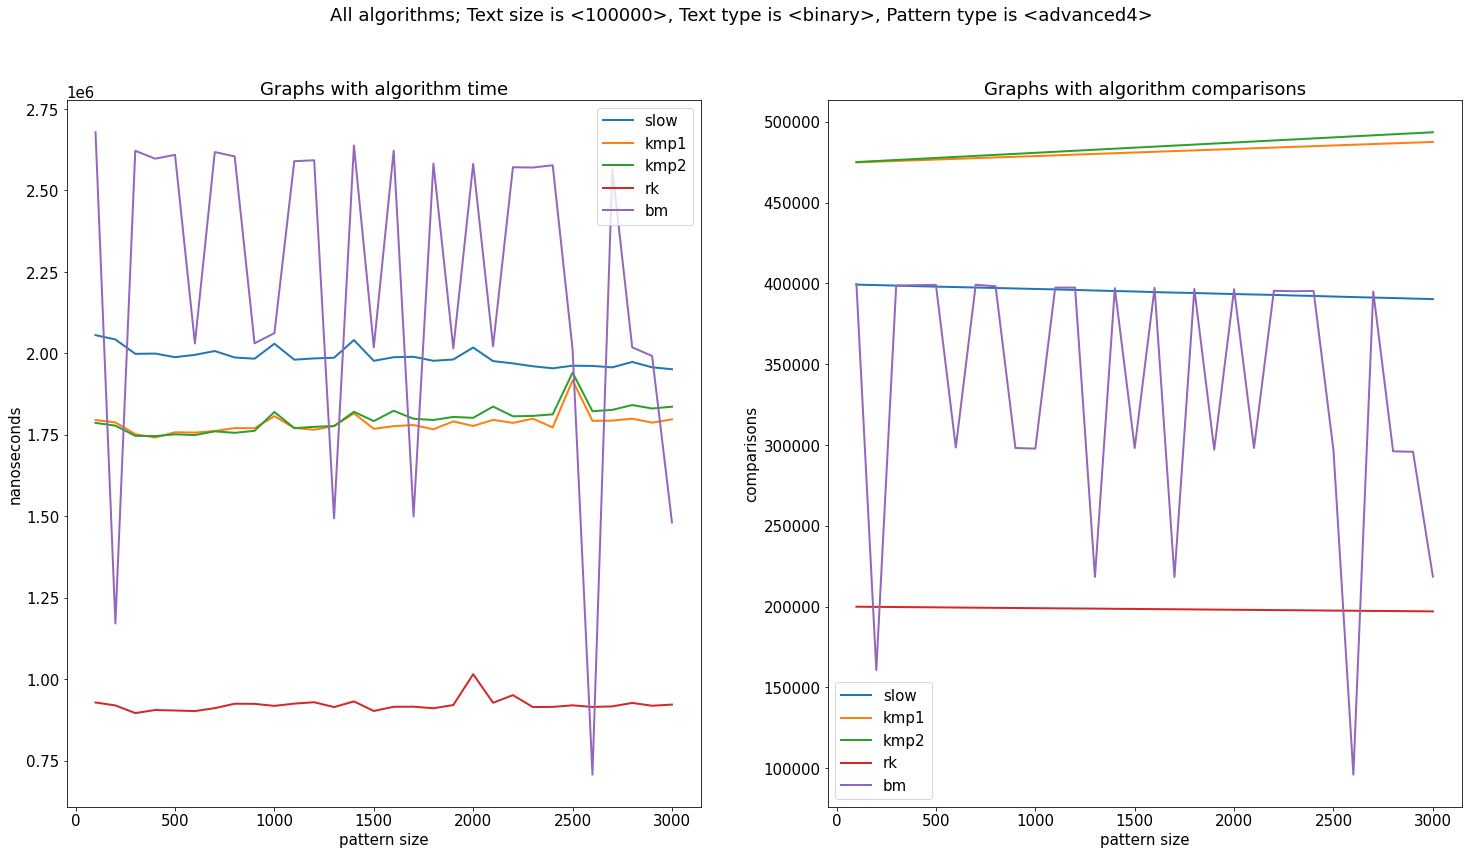

In [57]:
plotTestsTimeComps('100000', 'binary', 'advanced1')
plotTestsTimeComps('100000', 'binary', 'advanced2')
plotTestsTimeComps('100000', 'binary', 'advanced3')
plotTestsTimeComps('100000', 'binary', 'advanced4')


##### Size - 100000; Text - Quad; Pattern - Advance


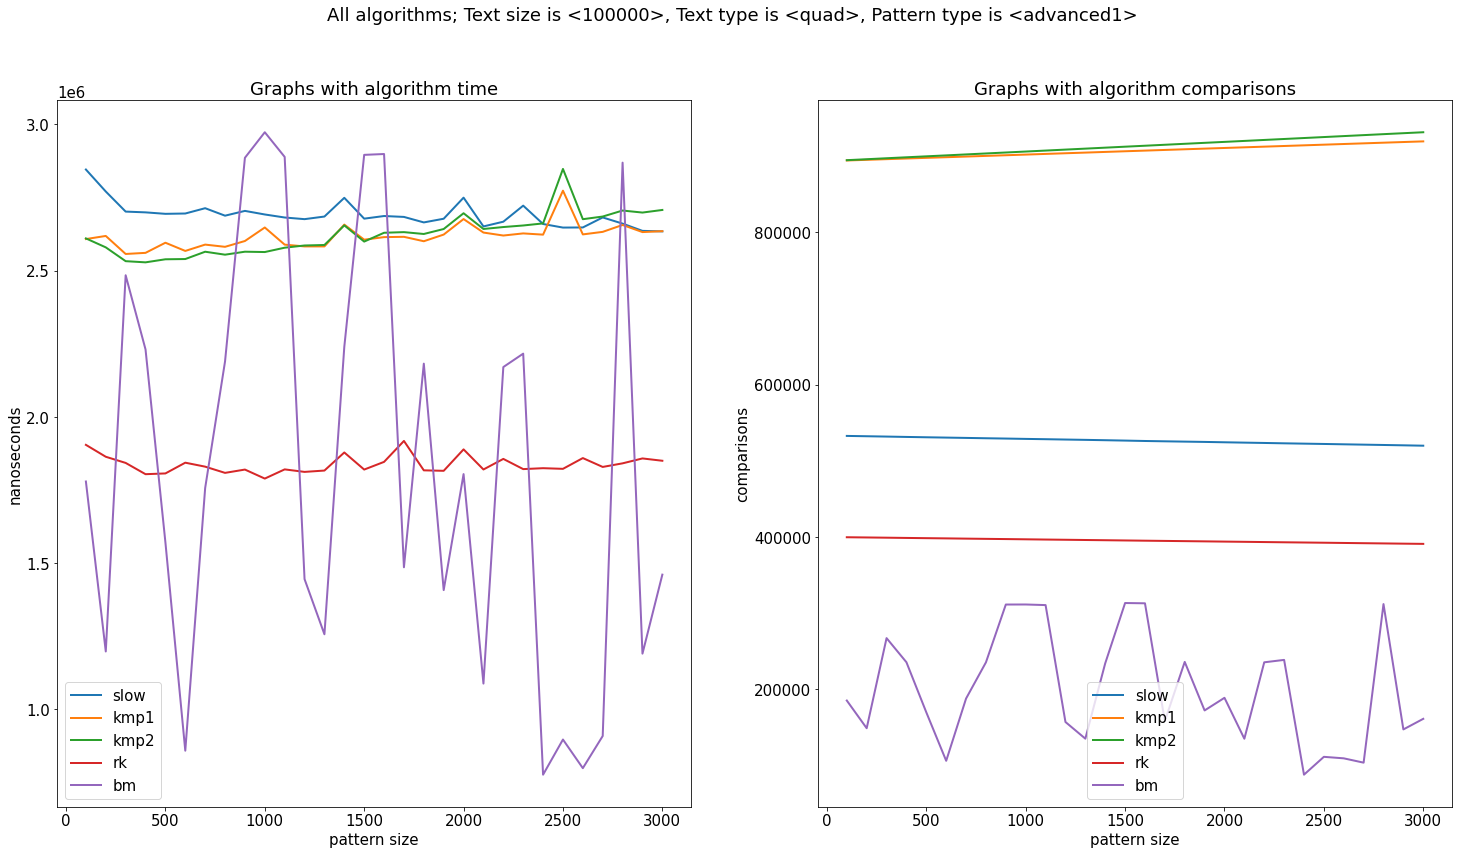

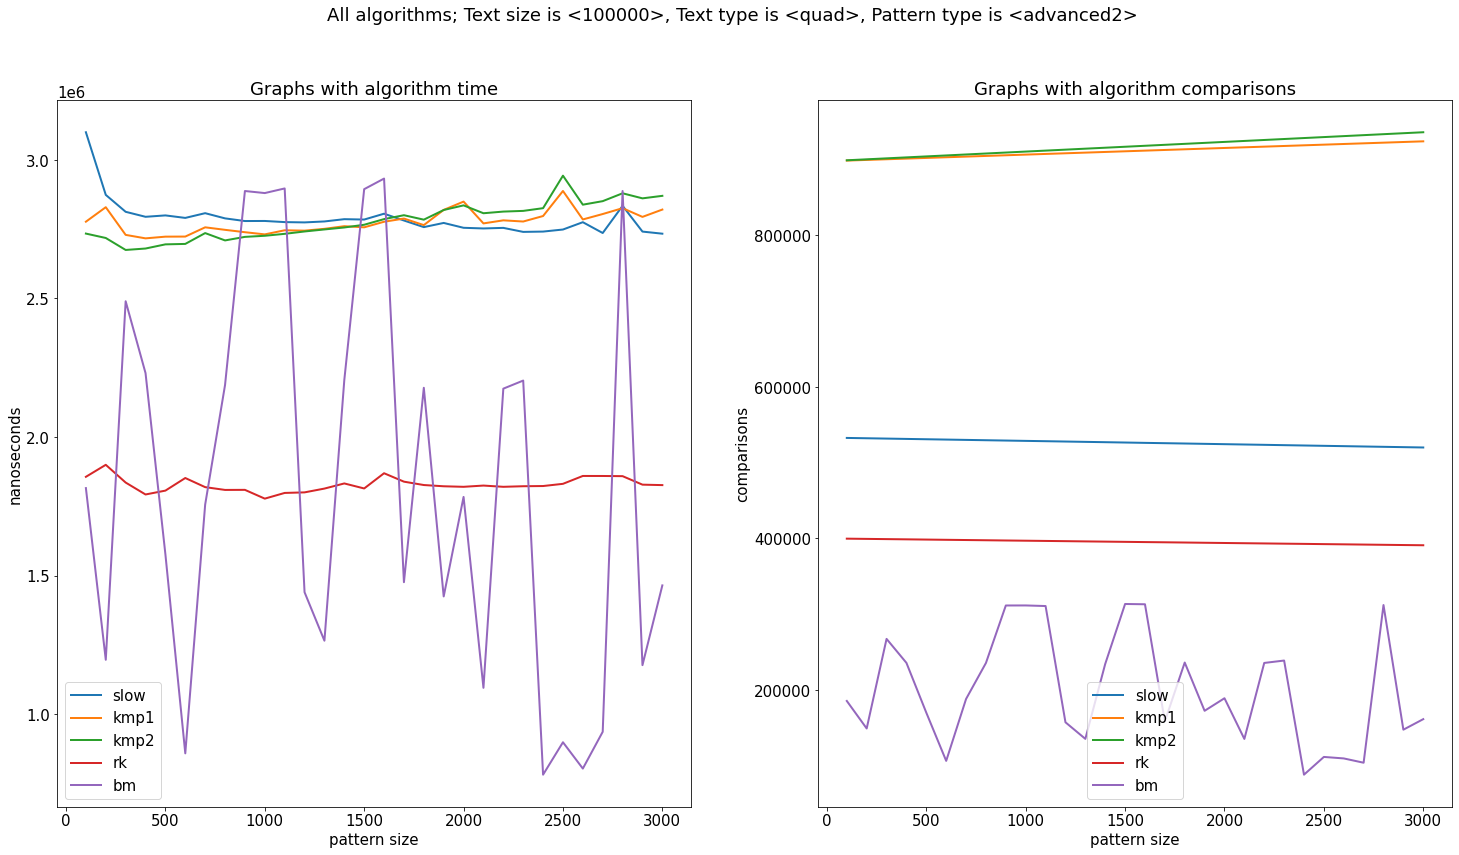

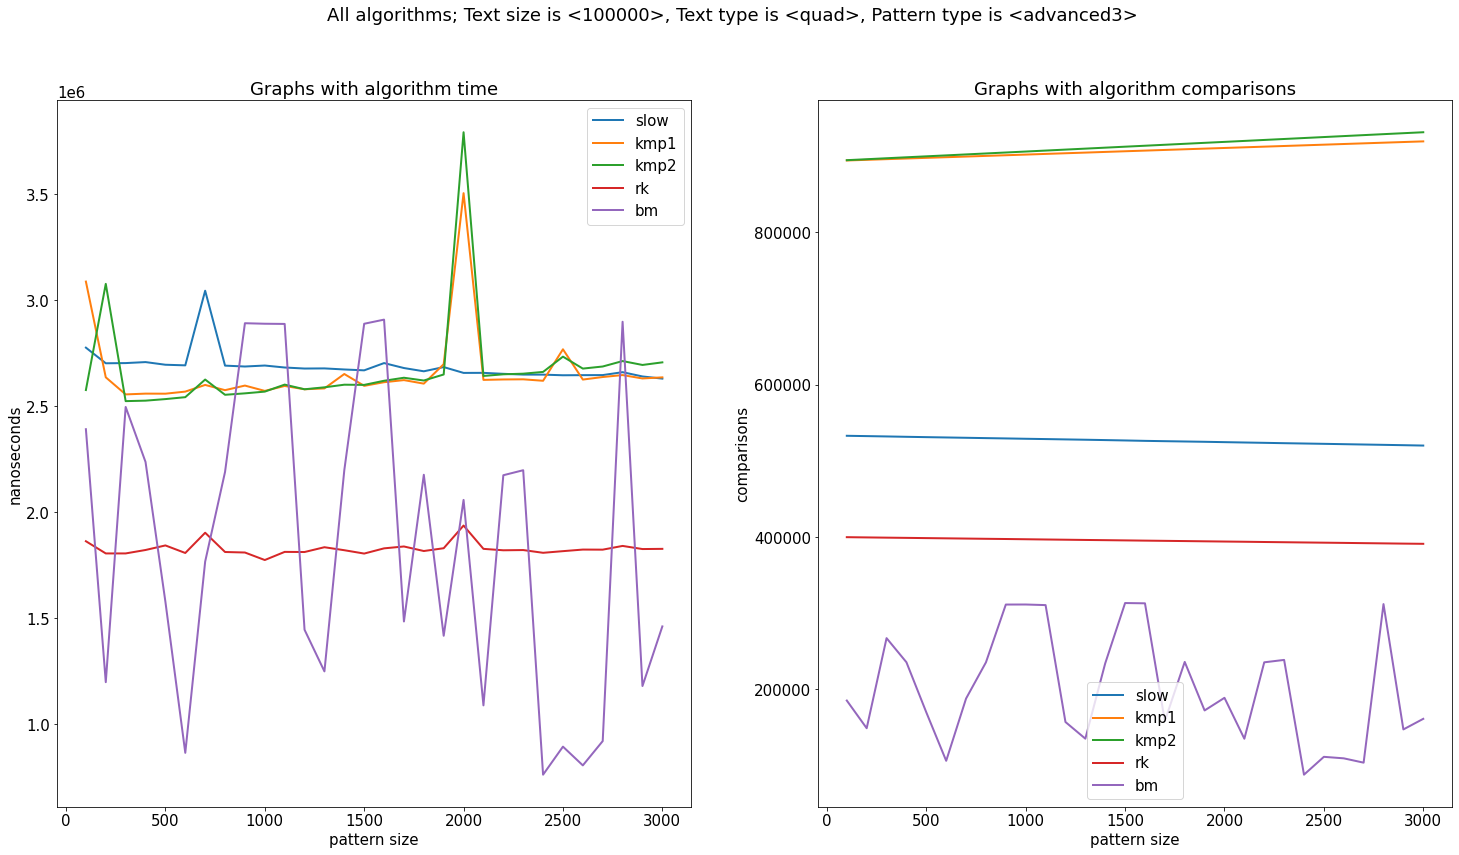

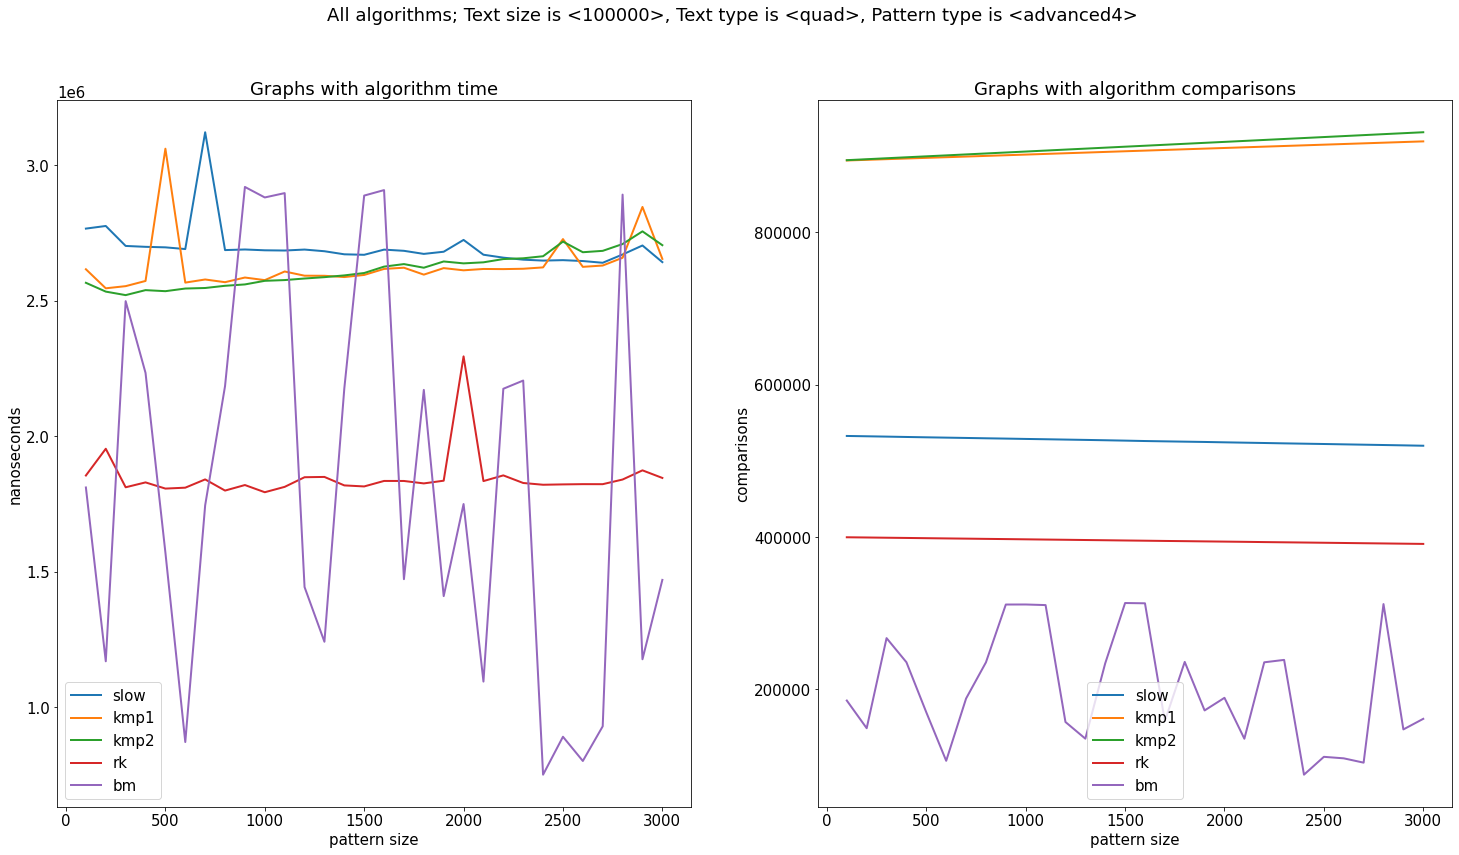

In [58]:
plotTestsTimeComps('100000', 'quad', 'advanced1')
plotTestsTimeComps('100000', 'quad', 'advanced2')
plotTestsTimeComps('100000', 'quad', 'advanced3')
plotTestsTimeComps('100000', 'quad', 'advanced4')
